<a href="https://colab.research.google.com/github/c-labropoulos/NN-for-lithological-segmentation/blob/main/toRaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [57]:
#!gdalinfo --version
!pip install geopandas
!pip install rasterio
!pip install pyshp
from osgeo import gdal
from osgeo import ogr
import rasterio
import geopandas as gpd
import shapefile as shp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import os

def lists_FOR_rasterize(shppath,tiffpath):
 rst_list=list()
 dest_name=list()
 shpfiles = []
 for dirpath, subdirs, files in os.walk(shppath):
    for x in files:
        if x.endswith(".shp"):
            shpfiles.append(os.path.join(dirpath, x))
            shapenames.append(x.split('.shp', 1)[0])
 for dirpath, subdirs, files in os.walk(tiffpath):
    for x in files:
        rst_list.append(os.path.join(dirpath, x))
        dest_name.append(x.split('.tif', 1)[0])

 return shpfiles,rst_list,dest_name,shapenames

def rasterize(shppath,tiffpath):
  shplist,rasterlist,destnamelist,shfilenames=lists_FOR_rasterize(shppath,tiffpath)
  nk=set(destnamelist).intersection(shfilenames)
  for rasterfile in rasterlist:
    raster = rasterio.open(rasterfile)
    
    for name in destnamelist:
        if name  in nk:
            pos=shfilenames.index(name)
            print(shpfiles[pos])
       
        vector = gpd.read_file(shplist[pos])
        # create a numeric unique value for each row
        vector['labels_Lit'] = range(0,len(vector))
        # create tuples of geometry, value pairs, where value is the attribute value you want to burn
        geom_value = ((geom,value) for geom, value in zip(vector.geometry, vector["labels_Lit"]))
        # Rasterize vector using the shape and transform of the raster
        rasterized = features.rasterize(geom_value,
                                        out_shape = raster.shape,
                                        transform = raster.transform,
                                        all_touched = True,
                                        fill = -1,   # background value
                                        merge_alg = MergeAlg.replace,
                                        dtype = np.int16)
       
        with rasterio.open(
             "/content/drive/MyDrive/raster_to_be_used/"+name+"_rasterized_vector.tif", "w",
             driver = "GTiff",
             transform = raster.transform,
             dtype=rasterized.dtype,
         #  dtype = rasterio.uint8,

            count = 1,
            width = raster.width,
            height = raster.height) as dst:
          dst.write(rasterized, indexes = 1)
shape_dir = "/content/drive/MyDrive/LithDatasSHP"
raster_dir='/content/drive/MyDrive/LithDatasTIF'
rasterize(shape_dir,raster_dir)


/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/XIOS.shp
/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/My

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Voras.shp
/content/drive/MyDrive/LithDatasSHP/XIOS.shp
/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyD

/content/drive/MyDrive/LithDatasSHP/Voras.shp
/content/drive/MyDrive/LithDatasSHP/XIOS.shp
/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyD

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/XIOS.shp
/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/My

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri

In [59]:
vector = gpd.read_file("/content/drive/MyDrive/LithDatasSHP/Anafi.shp")
rst_path='/content/drive/MyDrive/LithDatasTIF/Anafi.tif'
raster = rasterio.open(rst_path)

In [60]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio import features
from rasterio.enums import MergeAlg
from rasterio.plot import show
import numpy as np
# create a numeric unique value for each row
#col_list =  list(vector["labels_Lit"])
#print(col_list)

vector['labels_Lit'] = range(0,len(vector))
#print(vector['labels_Lit'])

# create tuples of geometry, value pairs, where value is the attribute value you want to burn
geom_value = ((geom,value) for geom, value in zip(vector.geometry, vector["labels_Lit"]))

# Rasterize vector using the shape and transform of the raster
rasterized = features.rasterize(geom_value,
                                out_shape = raster.shape,
                                transform = raster.transform,
                                all_touched = True,
                                fill = -1,   # background value
                                merge_alg = MergeAlg.replace,
                                dtype = np.int16)

#print(rasterized)
#import geopandas as gpd
#df = gpd.read_file('../../Datasets/italy-points-shape/points.shp')
#df.head()

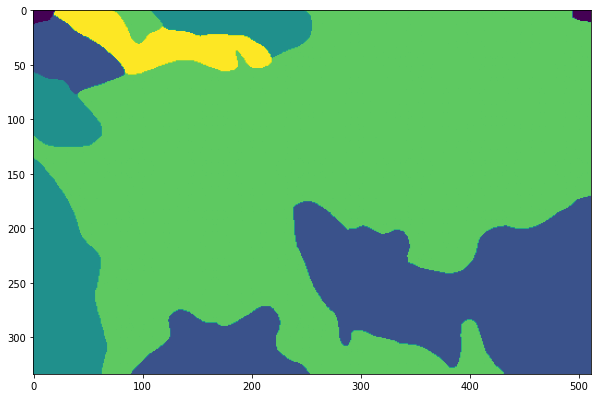

In [61]:
# Plot raster
fig, ax = plt.subplots(1, figsize = (10, 10))
#handles, labels = ax.get_legend_handles_labels(vector['labels_Lit'])
#ax.legend(labels,loc='upper right')
show(rasterized, ax = ax)
plt.gca()
with rasterio.open(
        "/content/drive/MyDrive/raster_to_be_used/Anafi_rasterized_vector.tif", "w",
        driver = "GTiff",
        transform = raster.transform,
        dtype=rasterized.dtype,
      #  dtype = rasterio.uint8,

        count = 1,
        width = raster.width,
        height = raster.height) as dst:
    dst.write(rasterized, indexes = 1)

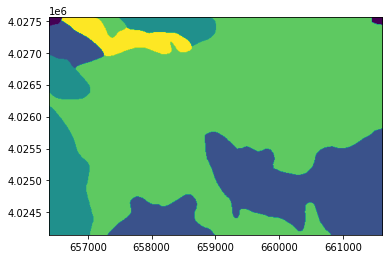

<AxesSubplot:>

In [62]:
rst_path='/content/drive/MyDrive/raster_to_be_used/Anafi_rasterized_vector.tif'
from osgeo import gdal
raster = rasterio.open(rst_path)
#raster.RasterCount
show(raster)

In [63]:
import os
from os import listdir
 
# get the path/directory
shape_dir = "/content/drive/MyDrive/LithDatasSHP"
raster_dir='/content/drive/MyDrive/LithDatasTIF'
shp_list=list()  
rst_list2=list()
rst_list=list()
dest_name=list()


for shapefiles in os.listdir(shape_dir):
 
    # check if the image ends with png
    if (shapefiles.endswith(".shp")):
        shp_list.append(str(os.path.abspath(shapefiles)))
print("THE SHAPEFILES\n"+str(shp_list))
for rasters in os.listdir(raster_dir):
    rst_list2.append(rasters)
    rst_list.append(str(os.path.abspath(rasters)))
print("THE RASTERFILES\n"+str(rst_list)+"\n"+str(rst_list2))
for i in rst_list2:
    
    dest_name.append(i.split('.tif', 1)[0])
print(dest_name)   



THE SHAPEFILES
['/content/Amfilochia.shp', '/content/Anafi.shp', '/content/Crete_B.shp', '/content/Desfina_B.shp', '/content/Crete_A.shp', '/content/Agios_Georgios.shp', '/content/Grevena.shp', '/content/Ermoupoli.shp', '/content/Exarchos.shp', '/content/Kastro.shp', '/content/Kimmeria.shp', '/content/Kirko_Bunaras.shp', '/content/Kithnos_A.shp', '/content/Kithnos_B.shp', '/content/Kyprios.shp', '/content/Lighurio.shp', '/content/Megara.shp', '/content/Mesorrahi.shp', '/content/Metsitia_Arta.shp', '/content/Monopigado.shp', '/content/Neraidoxori.shp', '/content/Petroto.shp', '/content/Skandalo.shp', '/content/Tirnavos.shp', '/content/Voras.shp', '/content/XIOS.shp', '/content/LIMENARIA.shp', '/content/Velia.shp', '/content/Desfina_.shp', '/content/naxos_corected.shp']
THE RASTERFILES
['/content/Agios_Georgios.tif', '/content/Amfilochia.tif', '/content/Anafi.tif', '/content/Crete_A.tif', '/content/Crete_B.tif', '/content/Desfina_.tif', '/content/Desfina_B.tif', '/content/Ermoupoli.tif',

In [64]:
# Driver function
import os
shape_dir = "/content/drive/MyDrive/LithDatasSHP"
raster_dir='/content/drive/MyDrive/LithDatasTIF'
shpfiles = []
rst_list=list()
dest_name=list()
shapenames=[]
for dirpath, subdirs, files in os.walk(shape_dir):
    for x in files:
        if x.endswith(".shp"):
            shpfiles.append(os.path.join(shape_dir, x))
            shapenames.append(x.split('.shp', 1)[0])
for dirpath, subdirs, files in os.walk(raster_dir):
    for x in files:
        rst_list.append(os.path.join(raster_dir, x))
        dest_name.append(x.split('.tif', 1)[0])
nk=set(dest_name).intersection(shapenames)

for x in dest_name:
    if x  in nk:
        pos=shapenames.index(x)
        print(shpfiles[pos])
           

/content/drive/MyDrive/LithDatasSHP/Agios_Georgios.shp
/content/drive/MyDrive/LithDatasSHP/Amfilochia.shp
/content/drive/MyDrive/LithDatasSHP/Anafi.shp
/content/drive/MyDrive/LithDatasSHP/Crete_A.shp
/content/drive/MyDrive/LithDatasSHP/Crete_B.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_.shp
/content/drive/MyDrive/LithDatasSHP/Desfina_B.shp
/content/drive/MyDrive/LithDatasSHP/Ermoupoli.shp
/content/drive/MyDrive/LithDatasSHP/Exarchos.shp
/content/drive/MyDrive/LithDatasSHP/Grevena.shp
/content/drive/MyDrive/LithDatasSHP/Kastro.shp
/content/drive/MyDrive/LithDatasSHP/Kimmeria.shp
/content/drive/MyDrive/LithDatasSHP/Kirko_Bunaras.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_A.shp
/content/drive/MyDrive/LithDatasSHP/Kithnos_B.shp
/content/drive/MyDrive/LithDatasSHP/Kyprios.shp
/content/drive/MyDrive/LithDatasSHP/Lighurio.shp
/content/drive/MyDrive/LithDatasSHP/LIMENARIA.shp
/content/drive/MyDrive/LithDatasSHP/Megara.shp
/content/drive/MyDrive/LithDatasSHP/Mesorrahi.shp
/content/dri